# Module 4: Getting Started with `pandas`

<sub><sup>The notebook is prepared based on the fifth chapter of McKinney, M. (2017). Python for Data Analysis, O'Reilly. ISBN 9781491957660.</sup></sub>

# 1. Introduction to Pandas

`pandas` will be a major tool of interest throughout much of the rest of the book. It contains data structures and data manipulation tools designed to make data cleaning and analysis fast and easy in Python. 

`pandas` is often used together with numerical and analytical tools like NumPy and SciPy, statsmodels, and scikit-learn, and data visualization libraries (matplotlib). 

`pandas` adopts significant parts of NumPy’s idiomatic style of array-based computing, data processing without for loops. 

The biggest difference with Numpy is that pandas is designed for working with **tabular** or **heterogeneous** data. NumPy, by contrast, is best suited for working with homogeneous numerical array data.

To be able to use `pandas`, you need to explicitly import it as shown below:

In [1]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

To get started with pandas, you will need to know well its two data structures:

*   Series
*   DataFrame


# 2. Series

A Series is a one-dimensional array-like object containing 

*   a sequence of values and 
*   an associated array of data labels, called its index.

The simplest Series is formed from only an array of data:


In [3]:
# Create a series object with [4, 7, -5, 3] 
obj = pd.Series([4, 7, -5, 3] )
obj

0    4
1    7
2   -5
3    3
dtype: int64

As seen in the output, the `index` is displayed on the
*left* and the `values` are shown on the *right*.

Since we did not specify an index for the data, a default one consisting of the integers 0 through `N` - 1 (where `N` is the length of the data) is created. 

You can get the array representation and index object of the Series via its `values` and `index` attributes, respectively:

In [4]:
# Display the values in the Series object
obj.values

array([ 4,  7, -5,  3])

In [7]:
# Display the indicies in the Series object
obj.index
#list(obj.index)

RangeIndex(start=0, stop=4, step=1)

Often it will be desirable to create a Series with an `index` identifying each data point with a label:

In [8]:
obj2 = pd.Series([4, 7, -5, 3], index=['d', 'b', 'a', 'c'])
obj2

d    4
b    7
a   -5
c    3
dtype: int64

In [9]:
# Display the index of obj2
obj2.index

Index(['d', 'b', 'a', 'c'], dtype='object')

Compared with NumPy arrays, you can use *labels* in the `index` when selecting single values or a set of values:

In [10]:
# Get the element at index 'a'
obj2['a']

-5

In [11]:
# Assign 6 value to element at index 'd'
obj2['d'] = 6
obj2

d    6
b    7
a   -5
c    3
dtype: int64

Below, `['c', 'a', 'd']` is interpreted as a list of indices, even though it contains strings instead of integers.

In [12]:
obj2[['c', 'a', 'd']]

c    3
a   -5
d    6
dtype: int64

Operations such as filtering with a boolean array, scalar multiplication, or applying math functions will preserve the **index-value** link:

In [13]:
# Get the values greater than 0 in obj2
obj2[obj2>0]

d    6
b    7
c    3
dtype: int64

In [15]:
# Multiply obj2 by 2
obj2*2

d    12
b    14
a   -10
c     6
dtype: int64

Another way to think about a Series is as a *fixed-length, ordered* `dict`, as it is a *mapping of index values to data values*. 

It can be used in many contexts where you might use a dict.

For example, you can check if a specific index exists or not using the following statement (which is the same in dict):

In [16]:
# Check if index 'b' exitst in obj2
'b' in obj2

True

In [17]:
# Check if index '2' exitst in obj2
'2' in obj2

False

Should you have data contained in a Python `dict`, you can create a `Series` from it by passing the `dict`:

In [18]:
sdata = {'Ohio': 35000, 'Texas': 71000, 'Oregon': 16000, 'Utah': 5000}
# Create a series called obj3 using sdata 
obj3 = pd.Series(sdata)
obj3

Ohio      35000
Texas     71000
Oregon    16000
Utah       5000
dtype: int64

When you are only passing a dict, the index in the resulting Series will have the dict’s keys in sorted order. 

You can override this by passing the dict keys in the order you want them to appear in the resulting Series:

In [19]:
states = ['California', 'Ohio', 'Oregon', 'Texas']
# Create a series called obj4 using sdata as data source, and states as index
obj4 = pd.Series(sdata, index=states)
obj4

California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
dtype: float64

Above, three values found in `sdata` were placed in the appropriate locations, but since no value for '*California*' was found, it appears as ***NaN*** (*not a number*), which is considered in `pandas` to mark missing or *NA* values. 

Since '*Utah*' was not included in `states`, it is excluded from the resulting object.

We will use the terms “missing” or “NA” interchangeably to refer to missing data. The `isnull` and `notnull` functions in pandas should be used to detect *missing* data:

In [24]:
# Apply isnull on obj4
pd.isnull(obj4)

California     True
Ohio          False
Oregon        False
Texas         False
dtype: bool

In [22]:
# Apply notnull on obj4
pd.notnull(obj4)

California    False
Ohio           True
Oregon         True
Texas          True
dtype: bool

Series also has these as instance methods:

In [23]:
# Apply isnull on obj4 by chaining
obj4.isnull()

California     True
Ohio          False
Oregon        False
Texas         False
dtype: bool

Working with missing data will be covered in more detail in Module 6.

A useful Series feature for many applications is that it **automatically aligns by index label in arithmetic operations**:

In [25]:
obj3

Ohio      35000
Texas     71000
Oregon    16000
Utah       5000
dtype: int64

In [26]:
obj4

California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
dtype: float64

In [27]:
# Apply + operation on obj3 and obj4
obj3 + obj4

California         NaN
Ohio           70000.0
Oregon         32000.0
Texas         142000.0
Utah               NaN
dtype: float64

Data alignment features will be addressed in more detail later. If you have experience with databases, you can think about this as being similar to a **join** operation.

A Series’s index can be altered in-place by assignment:

In [28]:
# Print obj
obj

0    4
1    7
2   -5
3    3
dtype: int64

In [30]:
# Change the indices of obj with ['Bob', 'Steve', 'Jeff', 'Ryan']
obj.index = ['Bob', 'Steve', 'Jeff', 'Ryan']
obj

Bob      4
Steve    7
Jeff    -5
Ryan     3
dtype: int64

# 3. DataFrame

A `DataFrame` is simply a 2 dimensional data structure, like a 2 dimensional array, or a table with rows and columns.

It contains an ordered collection of columns, each of which can be a different value type (numeric, string, boolean, etc.).

There are many ways to construct a `DataFrame`, though one of the most common is from:

*   `dict` of equal-length lists
*   NumPy arrays



In [31]:
data = {'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada', 'Nevada'],
'year': [2000, 2001, 2002, 2001, 2002, 2003],
'pop': [1.5, 1.7, 3.6, 2.4, 2.9, 3.2]}
# Create a DataFrame called frame using data
frame = pd.DataFrame(data)

The resulting `DataFrame` will have its `index` assigned automatically as with Series, and the columns are placed in *sorted* order:

In [32]:
# print frame
frame

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9
5,Nevada,2003,3.2


For large DataFrames, the head method selects only the first five rows:

In [33]:
# use head() to get the first 5 rows
frame.head()

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9


If you specify a sequence of columns, the DataFrame’s columns will be arranged in that order:

In [34]:
# Rearrange the order of the columns
pd.DataFrame(data, columns = ['year','state', 'pop'])

,year,state,pop
0,2000,Ohio,1.5
1,2001,Ohio,1.7
2,2002,Ohio,3.6
3,2001,Nevada,2.4
4,2002,Nevada,2.9
5,2003,Nevada,3.2


If you pass a column that isn’t contained in the `dict`, it will appear with missing values in the result:

In [35]:
myIndex = ['one', 'two', 'three', 'four', 'five', 'six']
myColumns = ['year', 'state', 'pop', 'debt']
# Create a dataframe called frame2 using myIndex and myColumns
frame2 = pd.DataFrame(data, columns = myColumns, index = myIndex )
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,NaN
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,NaN
five,2002,Nevada,2.9,NaN
six,2003,Nevada,3.2,NaN


You can print the column names of an `DataFrame` using the `columns` attribute:

In [36]:
# print the columns of frame2
frame2.columns

Index(['year', 'state', 'pop', 'debt'], dtype='object')

A column in a `DataFrame` can be retrieved as a `Series` either by `dict`-like notation or by attribute:

In [38]:
# Retrieve the state column with dict-like notation
frame2['state']

one        Ohio
two        Ohio
three      Ohio
four     Nevada
five     Nevada
six      Nevada
Name: state, dtype: object

In [39]:
# Retrieve the year column was an attribute
frame2.year

one      2000
two      2001
three    2002
four     2001
five     2002
six      2003
Name: year, dtype: int64

Note that the returned `Series` have the *same index* as the `DataFrame`, and their name attribute has been appropriately set.

`frame2[column]` works for any column name, but `frame2.column`
**only** works when the column name is a valid Python variable
name **kalın metin**. For example, for column names that has a space character (such as "Student Grade"), only the `frame2[column]` will work.

Rows can also be retrieved by *position* or *name* with the special `loc` attribute (much more on this later):

In [43]:
# Use loc to retrieve the row with index 'three'
frame2.loc['three']

year     2002
state    Ohio
pop       3.6
debt      NaN
Name: three, dtype: object

Columns can be modified by assignment. For example, the empty '`debt`' column could be assigned a scalar value or an array of values:

In [45]:
# Set all the debt column as 16.5
frame2['dept'] = 16.5
frame2

,year,state,pop,debt,dept
one,2000,Ohio,1.5,NaN,16.5
two,2001,Ohio,1.7,NaN,16.5
three,2002,Ohio,3.6,NaN,16.5
four,2001,Nevada,2.4,NaN,16.5
five,2002,Nevada,2.9,NaN,16.5
six,2003,Nevada,3.2,NaN,16.5


The following code assigns a range of values (from 0.0 to 5.0) to the `debt` column.

In [47]:
# Assigns a range of values (from 0.0 to 5.0) to the debt column.
frame2['dept'] = [1, 2, 3, 4, 5, 6]
frame2

,year,state,pop,debt,dept
one,2000,Ohio,1.5,NaN,1
two,2001,Ohio,1.7,NaN,2
three,2002,Ohio,3.6,NaN,3
four,2001,Nevada,2.4,NaN,4
five,2002,Nevada,2.9,NaN,5
six,2003,Nevada,3.2,NaN,6


When you are assigning lists or arrays to a column, the value’s length must match the length of the DataFrame. For example, in the above code, np.arrange(5.) would result in an error.

If you assign a `Series`, its labels will be realigned exactly to
the `DataFrame`’s index, inserting missing values in any holes:

In [48]:
val = pd.Series([-1.2, -1.5, -1.7], index=['two', 'four', 'five'])
# Set val to the debt column
frame2['dept'] = val
frame2

,year,state,pop,debt,dept
one,2000,Ohio,1.5,NaN,NaN
two,2001,Ohio,1.7,NaN,-1.2
three,2002,Ohio,3.6,NaN,NaN
four,2001,Nevada,2.4,NaN,-1.5
five,2002,Nevada,2.9,NaN,-1.7
six,2003,Nevada,3.2,NaN,NaN


The `del` keyword will delete columns as with a dict. As an example of `del`, we first add a new column of boolean values where the state
column equals 'Ohio':

In [49]:
# Add a new column of boolean values indicating 
# whether the state column is 'Ohio' or not
frame2['eastern'] = frame2.state == 'Ohio'
frame2

,year,state,pop,debt,dept,eastern
one,2000,Ohio,1.5,NaN,NaN,True
two,2001,Ohio,1.7,NaN,-1.2,True
three,2002,Ohio,3.6,NaN,NaN,True
four,2001,Nevada,2.4,NaN,-1.5,False
five,2002,Nevada,2.9,NaN,-1.7,False
six,2003,Nevada,3.2,NaN,NaN,False


The `del` method can then be used to remove this column:

In [50]:
# Use del to delete the column added above
del frame2['eastern']
frame2.columns

Index(['year', 'state', 'pop', 'debt', 'dept'], dtype='object')

# 4. Essential Functionality

## 4.1. Reindexing

An important method on pandas objects is reindex, which means to create a new object with the data conformed to a new index. Consider an example:

In [51]:
obj = pd.Series([4.5, 7.2, -5.3, 3.6], index=['d', 'b', 'a', 'c'])
obj

d    4.5
b    7.2
a   -5.3
c    3.6
dtype: float64

Calling `reindex` on this Series rearranges the data according to the new index. Missing values will be introduced if any index values were not already present:

In [52]:
# Change the index of obj with ['a', 'b', 'c', 'd', 'e']
# and assign it to a new object called obj2
obj2 = obj.reindex(['a', 'b', 'c', 'd', 'e'])
obj2

a   -5.3
b    7.2
c    3.6
d    4.5
e    NaN
dtype: float64

For ordered data like time series, it may be desirable to do some interpolation (the process of estimating unknown values that fall between known values) or filling of values when reindexing. 

The `method` option allows us to do this, using a method such as `ffill`, which *forward-fills* the values:

In [53]:
obj3 = pd.Series([15, 5, 20], index=['12.05.2021', '14.05.2021', '16.05.2021'])
obj3

12.05.2021    15
14.05.2021     5
16.05.2021    20
dtype: int64

In [55]:
myData = ['12.05.2021', '13.05.2021','14.05.2021', '15.05.2021', '16.05.2021']
# Reindex obj3 with myData and use ffill method
obj3.reindex(myData, method = 'ffill')

12.05.2021    15
13.05.2021    15
14.05.2021     5
15.05.2021     5
16.05.2021    20
dtype: int64

With *DataFrame*, `reindex` can alter either the (row) index, columns, or both. When passed only a sequence, it reindexes the rows in the result:

In [56]:
frame = pd.DataFrame(np.arange(9).reshape((3, 3)),
                      index=['a', 'c', 'd'],
                      columns=['Ohio', 'Texas', 'California'])
frame

,Ohio,Texas,California
a,0,1,2
c,3,4,5
d,6,7,8


In [57]:
# Reindex frame with ['a', 'b', 'c', 'd']
frame2 = frame.reindex(['a', 'b', 'c', 'd'])
frame2

,Ohio,Texas,California
a,0.0,1.0,2.0
b,NaN,NaN,NaN
c,3.0,4.0,5.0
d,6.0,7.0,8.0


The columns can be *reindexed* with the `columns` keyword:

In [58]:
# Reindex columns of frame with ['Texas', 'Utah', 'California']
frame2 = frame.reindex(columns = ['Texas', 'Utah', 'California'])
frame2

,Texas,Utah,California
a,1,NaN,2
c,4,NaN,5
d,7,NaN,8


The other *arguments* for `reindex` function are listed below. You can try out some of them.

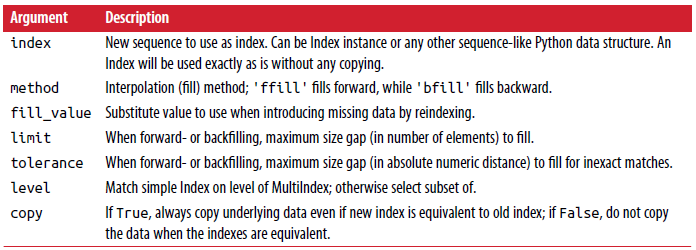

## 4.2. Dropping Entries (rows or columns) from an Axis

You can use the **`drop`** function to delete rows or columns from a DataFrame. This function returns a new object with the indicated value or values deleted from an axis.

The following example removes a row at a specific index from a Series object:

In [73]:
obj = pd.Series(np.arange(5.), index=['a', 'b', 'c', 'd', 'e'])
obj

a    0.0
b    1.0
c    2.0
d    3.0
e    4.0
dtype: float64

In [74]:
# Drom c column and assign it to new_obj
newobj = obj.drop(['c'])
newobj

a    0.0
b    1.0
d    3.0
e    4.0
dtype: float64

You can also drop multiple rows at once:

In [75]:
# Drop the d and c columns at once
obj.drop(['d', 'c'])

a    0.0
b    1.0
e    4.0
dtype: float64

With DataFrame, index values can be deleted from either axis. To illustrate this, we first create an example DataFrame:

In [76]:
data = pd.DataFrame(np.arange(16).reshape((4, 4)),
        index=['Ohio', 'Colorado', 'Utah', 'New York'],
        columns=['one', 'two', 'three', 'four'])
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


Calling drop with a sequence of labels will drop values from the row labels (axis 0) by default:

In [77]:
# Drop the rows with index of Colorado' and 'Ohio'
data.drop(['Colorado', 'Ohio'])

,one,two,three,four
Utah,8,9,10,11
New York,12,13,14,15


You can drop values from the columns by passing `axis=1` or `axis='columns'`:

In [79]:
# Drop the column two 
data.drop('two', axis = 'columns')

,one,three,four
Ohio,0,2,3
Colorado,4,6,7
Utah,8,10,11
New York,12,14,15


In [80]:
# Drop 'two', 'four' columns 
data.drop(['two', 'four'], axis = 1)

,one,three
Ohio,0,2
Colorado,4,6
Utah,8,10
New York,12,14


Many functions, like drop, which modify the size or shape of a Series or DataFrame, can manipulate an object **in-place** without returning a new object:

In [81]:
# Drop the c column using inplace=True
data.drop('two', axis = 1, inplace = True)
data

,one,three,four
Ohio,0,2,3
Colorado,4,6,7
Utah,8,10,11
New York,12,14,15


Be careful with the inplace, as it destroys any data that is dropped.

## 4.3. Indexing, Selection, and Filtering

Series indexing (obj[...]) works analogously to NumPy array indexing, except you can use the Series’s index values instead of only integers. 

Here are some examples of this:

In [82]:
obj = pd.Series(np.arange(4.), index=['a', 'b', 'c', 'd'])
obj

a    0.0
b    1.0
c    2.0
d    3.0
dtype: float64

In [83]:
obj['b']

1.0

In [84]:
# Return the elements with indices of 2 and 3
obj[2:4]

c    2.0
d    3.0
dtype: float64

In [85]:
# Return the elements with indices of ['b', 'a', 'd']
obj[['b', 'a', 'd']]

b    1.0
a    0.0
d    3.0
dtype: float64

In [86]:
# Return the elements with indices of 1 and 3
obj[[1,3]]

b    1.0
d    3.0
dtype: float64

Slicing with labels behaves differently than normal Python slicing in that the **endpoint is inclusive**:

In [87]:
# Slice the elements at indices of b and c
obj['a':'c']

a    0.0
b    1.0
c    2.0
dtype: float64

Assigning values using these methods modifies the corresponding section of the Series:

In [88]:
# Assign 5 to the elements at indices of b and c
obj['b':'c'] = 5
obj

a    0.0
b    5.0
c    5.0
d    3.0
dtype: float64

Indexing into a DataFrame is for retrieving one or more columns either with a single value or sequence:

In [89]:
data = pd.DataFrame(
        np.arange(16).reshape((4, 4)),
        index=['Ohio', 'Colorado', 'Utah', 'New York'],
        columns=['one', 'two', 'three', 'four'])
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [90]:
# Get column two
data['two']

Ohio         1
Colorado     5
Utah         9
New York    13
Name: two, dtype: int64

In [91]:
# Get columns three and one
data[['three', 'one']]

,three,one
Ohio,2,0
Colorado,6,4
Utah,10,8
New York,14,12


Indexing like this has a few special cases. First, slicing or selecting data with a boolean array:

In [92]:
# Select the data where three column is greater than 5
data[data['three'] > 5]

,one,two,three,four
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


Another use case is in indexing with a boolean DataFrame, such as one produced by a
scalar comparison:

In [93]:
data < 5

,one,two,three,four
Ohio,True,True,True,True
Colorado,True,False,False,False
Utah,False,False,False,False
New York,False,False,False,False


In [94]:
# Change the values less than 5 with 0
data[data<5] = 0
data

,one,two,three,four
Ohio,0,0,0,0
Colorado,0,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


### Selection with loc and iloc

For DataFrame **label-indexing** on the rows, I introduce the special indexing operators **`loc`** and **`iloc`**.

They enable you to select a subset of the rows and columns from a
DataFrame with NumPy-like notation using either axis labels (`loc`) or integers (`iloc`).

As a preliminary example, let’s select a single row and multiple columns by label:

In [95]:
#Select the row Colorado and the columns 'two' and three
data.loc['Colorado', ['two', 'three']]

two      5
three    6
Name: Colorado, dtype: int64

We’ll then perform some similar selections with integers using `iloc`:

In [96]:
# Use iloc to select the row with index 2 and columns with index 3, 0, and 1.
data.iloc[2, [3, 0, 1]]

four    11
one      8
two      9
Name: Utah, dtype: int64

In [97]:
# Use iloc to select the 3rd row (index 2)
data.iloc[2]

one       8
two       9
three    10
four     11
Name: Utah, dtype: int64

In [105]:
# Use iloc to select the 1st and 2nd rows and 4th, 1st, and 2nd columns
data.iloc[[0, 1], [3, 0, 1]]

,four,one,two
Ohio,0,0,0
Colorado,7,0,5


Both indexing functions work with slices in addition to single labels or lists of labels:

In [106]:
# Select all rows until Utah and only the column 2
data.loc[:'Utah', 'two']

Ohio        0
Colorado    5
Utah        9
Name: two, dtype: int64

In [108]:
# Select all rows and columns until the 3rd index
data.iloc[:3, :3]

,one,two,three
Ohio,0,0,0
Colorado,0,5,6
Utah,8,9,10


In [110]:
# Within the all rows and the columns until the 3rd index, 
  #select the rows where three column is greater than 5
data.iloc[:, :3][data['three']>5]

,one,two,three
Colorado,0,5,6
Utah,8,9,10
New York,12,13,14


## 4.4 Arithmetic and Data Alignment

An important pandas feature for some applications is the behavior of arithmetic between objects with different indexes. 

When you are adding together objects, if any index pairs are not the same, the respective index in the result will be the union of the
index pairs. 

For users with database experience, this is similar to an automatic **outer join** on the index labels. 

Let’s look at an example:

In [111]:
s1 = pd.Series([7.3, -2.5, 3.4, 1.5], index=['a', 'c', 'd', 'e'])
s1

a    7.3
c   -2.5
d    3.4
e    1.5
dtype: float64

In [112]:
s2 = pd.Series([-2.1, 3.6, -1.5, 4, 3.1], index=['a', 'c', 'e', 'f', 'g'])
s2

a   -2.1
c    3.6
e   -1.5
f    4.0
g    3.1
dtype: float64

Adding these together yields:

In [113]:
s1 + s2

a    5.2
c    1.1
d    NaN
e    0.0
f    NaN
g    NaN
dtype: float64

The internal data alignment introduces **missing values** in the label locations that *don’t overlap*. Missing values will then propagate in further arithmetic computations.

In the case of `DataFrame`, alignment is performed on both the rows and the columns:

In [114]:
df1 = pd.DataFrame(np.arange(9.).reshape((3, 3)), columns=list('bcd'), 
                   index=['Ohio', 'Texas', 'Colorado'])
df1

,b,c,d
Ohio,0.0,1.0,2.0
Texas,3.0,4.0,5.0
Colorado,6.0,7.0,8.0


In [115]:
df2 = pd.DataFrame(np.arange(12.).reshape((4, 3)), columns=list('bde'),
                   index=['Utah', 'Ohio', 'Texas', 'Oregon'])
df2

,b,d,e
Utah,0.0,1.0,2.0
Ohio,3.0,4.0,5.0
Texas,6.0,7.0,8.0
Oregon,9.0,10.0,11.0


Adding these together returns a `DataFrame` whose index and columns are the unions of the ones in each `DataFrame`:

In [116]:
df1 + df2

,b,c,d,e
Colorado,NaN,NaN,NaN,NaN
Ohio,3.0,NaN,6.0,NaN
Oregon,NaN,NaN,NaN,NaN
Texas,9.0,NaN,12.0,NaN
Utah,NaN,NaN,NaN,NaN


Since the `'c'` and `'e'` columns are not found in both DataFrame objects, they appear as all missing in the result. The same holds for the rows whose labels are not common to both objects.

If you add `DataFrame` objects with no column or row labels in common, the result will contain all nulls:

In [117]:
df1 = pd.DataFrame({'A': [1, 2]})
df2 = pd.DataFrame({'B': [3, 4]})
df1 - df2

,A,B
0,NaN,NaN
1,NaN,NaN


### Arithmetic methods with fill values

In arithmetic operations between differently indexed objects, you might want to fill with a special value, like 0, when an axis label is found in one object but not the other:

In [118]:
df1 = pd.DataFrame(np.arange(12.).reshape((3, 4)),
                   columns=list('abcd'))
df1

,a,b,c,d
0,0.0,1.0,2.0,3.0
1,4.0,5.0,6.0,7.0
2,8.0,9.0,10.0,11.0


In [119]:
df2 = pd.DataFrame(np.arange(20.).reshape((4, 5)),
                   columns=list('abcde'))
df2.loc[1, 'b'] = np.nan
df2

,a,b,c,d,e
0,0.0,1.0,2.0,3.0,4.0
1,5.0,NaN,7.0,8.0,9.0
2,10.0,11.0,12.0,13.0,14.0
3,15.0,16.0,17.0,18.0,19.0


Adding these together results in `NA` values in the locations that don’t overlap:

In [120]:
df1 + df2

,a,b,c,d,e
0,0.0,2.0,4.0,6.0,NaN
1,9.0,NaN,13.0,15.0,NaN
2,18.0,20.0,22.0,24.0,NaN
3,NaN,NaN,NaN,NaN,NaN


If you do not want missing values when the indices and/or columns do not overlap 100%, you can set some default value. 

In our case, using the **`add`** method on `df1`, we pass `df2` and an argument to `fill_value`:

In [121]:
df1.add(df2, fill_value=0)

,a,b,c,d,e
0,0.0,2.0,4.0,6.0,4.0
1,9.0,5.0,13.0,15.0,9.0
2,18.0,20.0,22.0,24.0,14.0
3,15.0,16.0,17.0,18.0,19.0


The following table gives the list of Series and DataFrame methods for arithmetic.

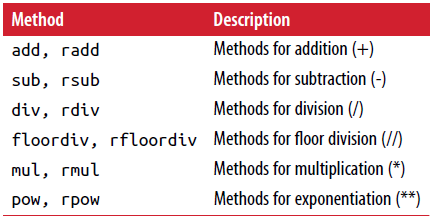

Each of them has a counterpart, starting with the letter r, that has arguments flipped. So these two statements are equivalent:

In [122]:
1 / df1

,a,b,c,d
0,inf,1.000000,0.500000,0.333333
1,0.250,0.200000,0.166667,0.142857
2,0.125,0.111111,0.100000,0.090909


In [123]:
df1.rdiv(1)

,a,b,c,d
0,inf,1.000000,0.500000,0.333333
1,0.250,0.200000,0.166667,0.142857
2,0.125,0.111111,0.100000,0.090909


Relatedly, when reindexing a Series or DataFrame, you can also specify a different fill value:

In [124]:
df1.reindex(columns=df2.columns, fill_value=0)

,a,b,c,d,e
0,0.0,1.0,2.0,3.0,0
1,4.0,5.0,6.0,7.0,0
2,8.0,9.0,10.0,11.0,0


## 4.5. Function Application and Mapping

NumPy **`ufuncs`** *(element-wise array methods)* also work with pandas objects:

In [125]:
np.random.seed(5)
frame = pd.DataFrame(np.random.randn(4, 3), columns=list('bde'),
                     index=['Utah', 'Ohio', 'Texas', 'Oregon'])
frame

,b,d,e
Utah,0.441227,-0.330870,2.430771
Ohio,-0.252092,0.109610,1.582481
Texas,-0.909232,-0.591637,0.187603
Oregon,-0.329870,-1.192765,-0.204877


In [126]:
# Apply abs function on frame to get the absolute values
np.abs(frame)

,b,d,e
Utah,0.441227,0.330870,2.430771
Ohio,0.252092,0.109610,1.582481
Texas,0.909232,0.591637,0.187603
Oregon,0.329870,1.192765,0.204877


Let's define a function called `f` that returns a difference between the maximum and minimum values in a given list of items.

In [127]:
def f(x):
  return x.max() - x.min()

You can apply this function on the `b` column of `frame`:

In [128]:
f(frame['b'])

1.3504598917412833

For such a short functions, it is a standard practice to write them using `lamda` expressions. 

The following defines the same function using lambda expression: 

In [129]:
f = lambda x: x.max() - x.min()

In [130]:
# Apply the f function on the b column of frame
f(frame['b'])

1.3504598917412833

A very frequent operation is to apply a function to each column or row. DataFrame’s `apply` method does exactly this:

In [131]:
# Apply the f function to each row of frame
frame.apply(f)

b    1.350460
d    1.302374
e    2.635648
dtype: float64

The result is a `Series` having the columns of frame as its index. 
Here the function `f`, which computes the difference between the maximum and minimum of a Series, is invoked *once on each column in frame*. 

If you pass `axis='columns'` to apply, the function will be invoked once per column instead:

In [132]:
# Apply the f function to each column of frame
frame.apply(f, axis = 'columns')

Utah      2.761641
Ohio      1.834573
Texas     1.096836
Oregon    0.987888
dtype: float64

Many of the most common array statistics (like `sum` and `mean`) are DataFrame methods, so using `apply` is not necessary.

In [133]:
# Compute the sum of per each column
frame.sum(axis = 'columns')

Utah      2.541129
Ohio      1.439999
Texas    -1.313266
Oregon   -1.727511
dtype: float64

The function passed to apply need not return a *scalar* value; it can also return a `Series` with multiple values:

In [134]:
def f(x):
  return pd.Series([x.min(), x.max()], index=['min', 'max'])

In [135]:
frame.apply(f)

,b,d,e
min,-0.909232,-1.192765,-0.204877
max,0.441227,0.109610,2.430771


In [136]:
frame.apply(f, axis="columns")

,min,max
Utah,-0.330870,2.430771
Ohio,-0.252092,1.582481
Texas,-0.909232,0.187603
Oregon,-1.192765,-0.204877


*Element-wise* Python functions can be used, too. Suppose you wanted to compute a formatted string from each floating-point value in frame. 
You can do this with **`applymap`**:

In [137]:
format = lambda x: '%.2f' % x
frame.applymap(format)

,b,d,e
Utah,0.44,-0.33,2.43
Ohio,-0.25,0.11,1.58
Texas,-0.91,-0.59,0.19
Oregon,-0.33,-1.19,-0.20


## 4.6. Sorting

Sorting a dataset by some criterion is another important built-in operation.

To sort by row or column index, use the `sort_index` method, which returns
a new, sorted object:

In [138]:
obj = pd.Series(range(4), index=['d', 'a', 'b', 'c'])
obj

d    0
a    1
b    2
c    3
dtype: int64

In [140]:
# Call sort_index function to sort obj by row index
obj.sort_index()

a    1
b    2
c    3
d    0
dtype: int64

With a DataFrame, you can sort by index on either axis:

In [142]:
frame = pd.DataFrame(np.arange(8).reshape((2, 4)),
                     index=['three', 'one'],
                     columns=['d', 'a', 'b', 'c'])
frame

,d,a,b,c
three,0,1,2,3
one,4,5,6,7


In [144]:
# Call sort_index function to sort frame by row
frame.sort_index(axis=0)

,d,a,b,c
one,4,5,6,7
three,0,1,2,3


In [145]:
# Call sort_index function to sort frame by column
frame.sort_index(axis=1)

,a,b,c,d
three,1,2,3,0
one,5,6,7,4


The data is sorted in ascending order by default, but can be sorted in descending order, too:

In [146]:
frame.sort_index(axis=1, ascending=False)

,d,c,b,a
three,0,3,2,1
one,4,7,6,5


To sort a Series by its **values**, use its **`sort_values`** method:

In [147]:
obj = pd.Series([4, 7, -3, 2])
obj

0    4
1    7
2   -3
3    2
dtype: int64

In [148]:
obj.sort_values()

2   -3
3    2
0    4
1    7
dtype: int64

When sorting a `DataFrame`, you can use the data in one or more columns as the sort keys. To do so, pass one or more column names to the by option of `sort_values`:

In [149]:
frame = pd.DataFrame({'b': [4, 7, -3, 2], 'a': [0, 1, 0, 1]})
frame

,b,a
0,4,0
1,7,1
2,-3,0
3,2,1


In [150]:
frame = frame.sort_index(axis=1)

In [151]:
frame.sort_values(by='b')

,a,b
2,0,-3
3,1,2
0,0,4
1,1,7


To sort by multiple columns, pass a list of names:

In [152]:
frame.sort_values(by=['a', 'b'])

,a,b
2,0,-3
0,0,4
3,1,2
1,1,7


# 5. Summarizing and Computing Descriptive Statistics

`pandas` objects are equipped with a set of common mathematical and statistical methods.

Most of these fall into the category of reductions or summary statistics, methods that extract a single value (like the sum or mean) from a Series or from the rows or columns of a DataFrame. 

Compared with the similar methods found on NumPy arrays, they have built-in handling for missing data. 

Consider a small `DataFrame`:

In [153]:
df = pd.DataFrame([[1.4, np.nan], [7.1, -4.5],
                   [np.nan, np.nan], [0.75, -1.3]],
                  index=['a', 'b', 'c', 'd'],
                  columns=['one', 'two'])
df

,one,two
a,1.40,NaN
b,7.10,-4.5
c,NaN,NaN
d,0.75,-1.3


Calling DataFrame’s **`sum`** method returns a Series containing column sums:

In [154]:
# Call the sum method to get the sum for each column
df.sum(axis=1)

a    1.40
b    2.60
c    0.00
d   -0.55
dtype: float64

Passing `axis='columns'` or `axis=1` sums across the columns instead:

In [155]:
# Call the sum method with axis='columns' to get the sum per row
df.sum(axis='columns')

a    1.40
b    2.60
c    0.00
d   -0.55
dtype: float64

You can exclude NA values from the computation. This can be done with the `skipna` option:

In [158]:
# Call mean method to compute the average per row. Pass skipna=False
df.mean(axis = 'rows', skipna=False)

one   NaN
two   NaN
dtype: float64

`describe` is one such example, producing multiple summary statistics in one shot:

In [159]:
df.describe()

,one,two
count,3.000000,2.000000
mean,3.083333,-2.900000
std,3.493685,2.262742
min,0.750000,-4.500000
25%,1.075000,-3.700000
50%,1.400000,-2.900000
75%,4.250000,-2.100000
max,7.100000,-1.300000


Descriptive and summary statistics are summarized in the following table.

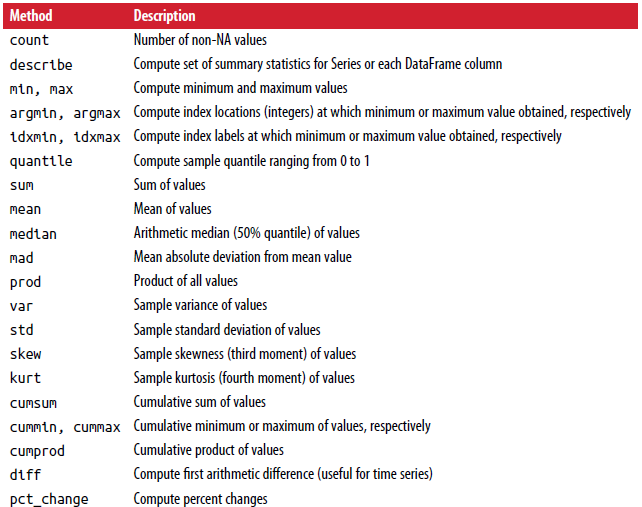

## 4.1. Correlation and Covariance

Some summary statistics, like correlation and covariance, are computed from pairs of arguments.

In [160]:
data = {'Exam1': [30, 36, 50, 55, 66, 67],
'Exam2': [39, 54, 60, 75, 53, 77],
'Exam3': [46.8, 75, 70, 67, 76, 88]}
examScores = pd.DataFrame(data, index=["A", "B", "C", "D", "E", "F",])
examScores

,Exam1,Exam2,Exam3
A,30,39,46.8
B,36,54,75.0
C,50,60,70.0
D,55,75,67.0
E,66,53,76.0
F,67,77,88.0


In [161]:
examScores.pct_change()

,Exam1,Exam2,Exam3
A,NaN,NaN,NaN
B,0.200000,0.384615,0.602564
C,0.388889,0.111111,-0.066667
D,0.100000,0.250000,-0.042857
E,0.200000,-0.293333,0.134328
F,0.015152,0.452830,0.157895


In [162]:
examScores.pct_change(axis=1)

,Exam1,Exam2,Exam3
A,NaN,0.300000,0.200000
B,NaN,0.500000,0.388889
C,NaN,0.200000,0.166667
D,NaN,0.363636,-0.106667
E,NaN,-0.196970,0.433962
F,NaN,0.149254,0.142857


The `corr` method of Series computes the correlation of the overlapping, non-NA, aligned-by-index values in two Series. 

In [163]:
examScores['Exam1'].corr(examScores['Exam2'])

0.6887435712023477

Relatedly, `cov` computes the covariance:

In [164]:
examScores['Exam1'].cov(examScores['Exam2'])

151.46666666666667

Since all columns are valid Python variable names, we can also select these columns using more concise syntax:

In [165]:
examScores.Exam1.corr(examScores.Exam2)

0.6887435712023477

DataFrame’s `corr` and `cov` methods, on the other hand, return a full correlation or covariance matrix as a DataFrame, respectively:

In [166]:
examScores.corr()

,Exam1,Exam2,Exam3
Exam1,1.000000,0.688744,0.748687
Exam2,0.688744,1.000000,0.688395
Exam3,0.748687,0.688395,1.000000


## 4.2. Unique Values, Value Counts, and Membership

Another class of related methods extracts information about the values contained in a one-dimensional Series. 

To illustrate these, consider this example:

In [167]:
obj = pd.Series(['c', 'a', 'd', 'a', 'a', 'b', 'b', 'c', 'c'])
obj

0    c
1    a
2    d
3    a
4    a
5    b
6    b
7    c
8    c
dtype: object

The first function is **`unique`**, which gives you an array of the unique values in a Series:

In [168]:
# Call unique function to obtain the unique values in the obj series
obj.unique()

array(['c', 'a', 'd', 'b'], dtype=object)

The unique values are not necessarily returned in sorted order, but could be sorted if needed (`uniques.sort()`). 

Relatedly, `value_counts` computes a Series containing value frequencies:

In [169]:
# Call value_counts function to obtain the frequencies of each value
obj.value_counts()

c    3
a    3
b    2
d    1
dtype: int64

`isin` performs a vectorized set membership check and can be useful in filtering a dataset down to a subset of values in a Series or column in a DataFrame:

In [170]:
obj

0    c
1    a
2    d
3    a
4    a
5    b
6    b
7    c
8    c
dtype: object

In [171]:
mask = obj.isin(['b', 'c'])
mask

0     True
1    False
2    False
3    False
4    False
5     True
6     True
7     True
8     True
dtype: bool

In [172]:
obj[mask]

0    c
5    b
6    b
7    c
8    c
dtype: object

The list of unique, value counts, and set membership methods are given in the following table.

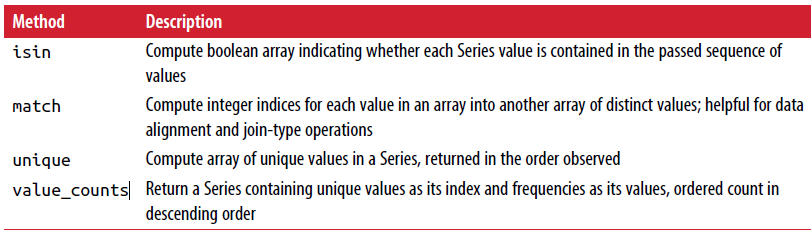

In some cases, you may want to compute a histogram on multiple related columns in a DataFrame. Here’s an example:

In [173]:
data = pd.DataFrame({'Quiz1': [1, 3, 4, 3, 4],
                     'Quiz2': [2, 3, 1, 2, 3],
                     'Quiz3': [1, 5, 2, 4, 4]})
data

,Quiz1,Quiz2,Quiz3
0,1,2,1
1,3,3,5
2,4,1,2
3,3,2,4
4,4,3,4


Passing `pandas.value_counts` to this DataFrame’s `apply` function gives:

In [174]:
result = data.apply(pd.value_counts).fillna(0)
result

,Quiz1,Quiz2,Quiz3
1,1.0,1.0,1.0
2,0.0,2.0,1.0
3,2.0,2.0,0.0
4,2.0,0.0,2.0
5,0.0,0.0,1.0


Here, the row labels in the result are the distinct values occurring in all of the columns.

The values are the respective counts of these values in each column.

# 6. Conclusion

In the next chapter, we’ll discuss tools for reading (or loading) and writing datasets with pandas. 

After that, we’ll dig deeper into data cleaning, wrangling, analysis, and
visualization tools using pandas.